# Empty-space based filtering

In [21]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from src.utilities.utilstf import *
from src.methods.method_empty_space import empty_space_denoising
from mcsm_benchmarks.SignalBank import SignalBank
from mcsm_benchmarks.Benchmark import Benchmark
from src.utilities.utilstf import voss

In [22]:
# np.random.seed(0) 
# signal parameters
SNRin = 20
N = 2**10
# Nsub=N//2
sbank = SignalBank(N=N, return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
s = sbank.signal_mc_multi_linear()
# s = sbank.signal_mc_crossing_chirps()
# s = sbank.signal_mc_synthetic_mixture_5()

In [23]:
SNRin = 20
noise = np.random.randn(N,)
noise = voss(N)
# noise = noise-np.mean(noise)
signal = Benchmark.sigmerge(s,noise,SNRin)

In [24]:
Nfft = 2*N
g,_ = get_round_window(Nfft)
S, F = get_spectrogram(signal, window = g)
radius = 0.95
test_params = { 'fun':'Fest', 'correction':'rs', 'transform':'asin(sqrt(.))', 'rmin':0.65,'rmax':1.05}
output = empty_space_denoising(signal,
                                radi_seg=radius,
                                radi_expand=radius,
                                adapt_thr=True,
                                test_params=test_params,
                                return_dic=True)

signal_output, mask = (output[key] for key in ('s_r','mask')) 


S_output, F_output = get_spectrogram(signal_output, window = g)


A curve_set(1d) object with 2500 curves observed at 10 argument values
(1 observed, 2499 simulated).
Contains: 
$ r     :  num [1:10] 0.672 0.714 0.756 0.798 0.84 ...
$ funcs :  num [1:10, 1:2500] 1.07 1.11 1.14 1.17 1.19 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:10] "17" "18" "19" "20" ...
  ..$ : chr [1:2500] "obs" "sim1" "sim2" "sim3" ...

22.990405575957936


In [26]:
tmin = int(np.sqrt(Nfft))
tmax = N-tmin
print(Benchmark.snr_comparison(s,signal_output,tmin=tmin,tmax=tmax))

23.4930977188529


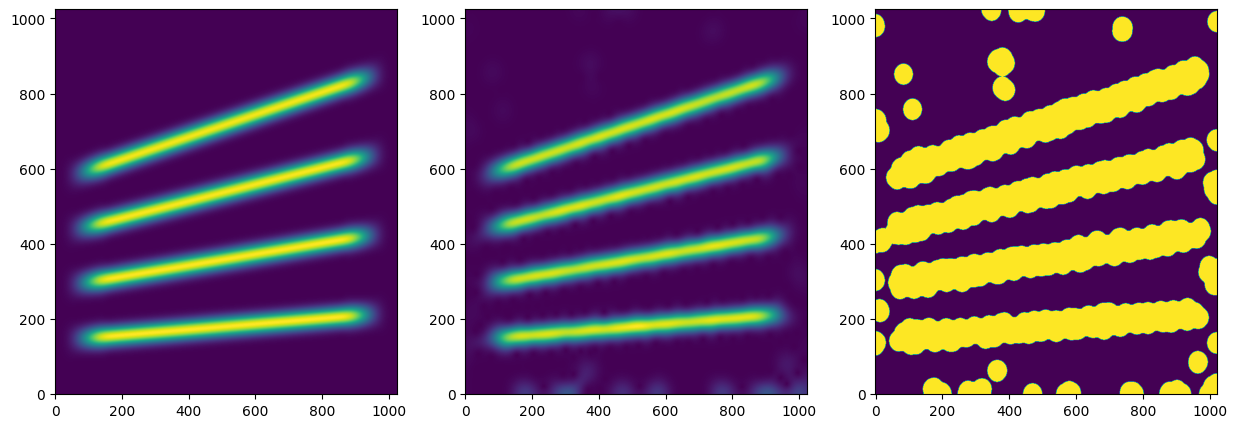

In [27]:
S, F = get_spectrogram(s, Nfft=Nfft)
F = F[0:Nfft//2+1]

S_output, F_output = get_spectrogram(signal_output, Nfft=Nfft)
F_output = F_output[0:Nfft//2+1]

fig, ax = plt.subplots(1,3,figsize = (15,5))
ax[0].imshow(abs(F), origin='lower', aspect='auto')#, cmap=cmocean.cm.deep)
# [ax[0].plot(instf[np.where(instf>=0)]*Nfft,'r') for instf in signal.instf]
ax[1].imshow(abs(F_output), origin='lower', aspect='auto')#, cmap=cmocean.cm.deep)
# ax[2].imshow(abs(F_output-F), origin='lower')#, cmap=cmocean.cm.deep)
ax[2].imshow(mask, origin='lower', aspect='auto')#, cmap=cmocean.cm.deep)

plt.show()

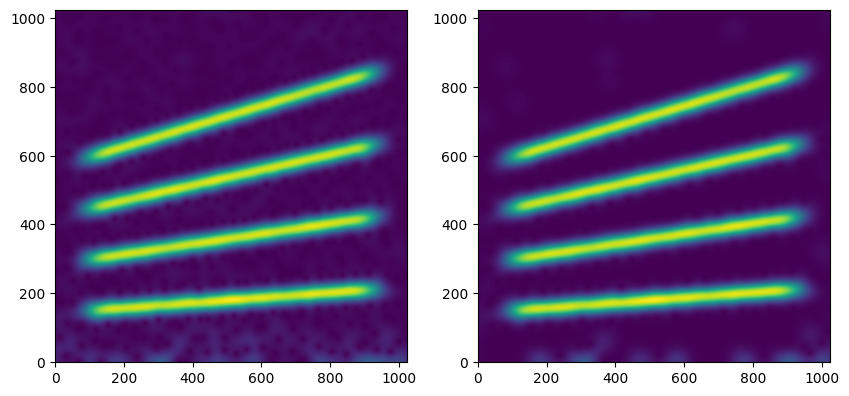

In [25]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(abs(F[0:N+1]), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(abs(F_output[0:N+1]), origin='lower')#, cmap=cmocean.cm.deep)

# ax[0].plot(signal.instf[0]*Nfft,'r')
# ax[0].plot(signal.instf[1]*Nfft,'r')
# ax[0].plot(signal.instf[2]*Nfft,'r')
plt.show()